In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd

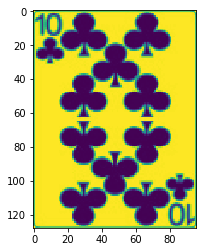

In [2]:
data_loc = '../dataset/'
decklist = os.listdir(data_loc)
cardlist=[]
for i in os.listdir(data_loc+'card_deck1'):
    cardlist.append(i[:-4])
imglist = []
for j in cardlist:
    for i in decklist:
        tmpimg = cv2.imread(data_loc+i+'/'+j+'.jpg', cv2.IMREAD_GRAYSCALE)
        tmpimg = cv2.resize(tmpimg, (96, 128), interpolation=cv2.INTER_AREA)
        imglist.append(tmpimg)
labellist=[]
for i in cardlist:
    for j in range(len(decklist)):
        labellist.append(i)
plt.imshow(imglist[0])# hog = cv2.HOGDescriptor((100, 100), (10, 10), (5, 5), (5, 5), 9)
hog = cv2.HOGDescriptor((32,48), (16,16), (8,8), (8,8), 9)
computed = []
for img in imglist:
    computed.append(hog.compute(img))

In [3]:
# hog = cv2.HOGDescriptor((100, 100), (10, 10), (5, 5), (5, 5), 9)
hog = cv2.HOGDescriptor((32,48), (16,16), (8,8), (8,8), 9)
computed = []
for img in imglist:
    computed.append(hog.compute(img))
    

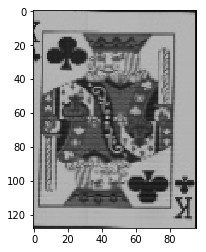

In [25]:
image = cv2.imread('CK.jpg')
image = cv2.resize(image, (96, 128), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

In [13]:
image.shape

(128, 96, 3)

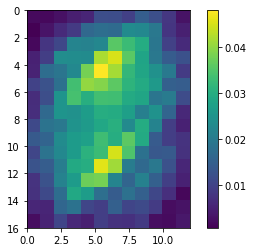

In [15]:
cell_size = (8,8)
block_size = (8,8)
nbins = 9
hog = cv2.HOGDescriptor(_winSize = (gray.shape[1]//cell_size[1] * cell_size[1],
                                   gray.shape[0] // cell_size[0] * cell_size[0]),
                       _blockSize = (block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                       _blockStride = (cell_size[1], cell_size[0]),
                       _cellSize = (cell_size[1], cell_size[0]),
                       _nbins = nbins)
n_cells = (gray.shape[0]//cell_size[0], gray.shape[1]//cell_size[1])

hog_feats = hog.compute(gray).reshape(n_cells[1] - block_size[1]+1,
                                      n_cells[0] - block_size[0] +1,
                                      block_size[0], block_size[1], nbins).transpose((1,0,2,3,4))
gradients = np.zeros((n_cells[0], n_cells[1], nbins))
cell_counts = np.full((n_cells[0], n_cells[1], 1), 0, dtype = int)
for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y +1,
                 off_x:n_cells[1] - block_size[1] + off_x +1] += hog_feats[:, :, off_y, off_x, :]
        cell_counts[off_y:n_cells[0] - block_size[0] + off_y +1,
                  off_x:n_cells[1] - block_size[1] + off_x +1] +=1
        
gradients /= cell_counts

color_bins = 5
plt.pcolor(gradients[:,:,color_bins])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

In [17]:
hog_feats.shape

(9, 5, 8, 8, 9)

In [18]:
gradients.shape

(16, 12, 9)

In [6]:
print(hog.winSize)
print(hog.blockSize)
print(hog.blockStride)

(96, 112)
(64, 64)
(8, 8)


In [9]:
print(hog.winSize)
print(hog.blockSize)
print(hog.blockStride)

(32, 48)
(16, 16)
(8, 8)


In [36]:
def myHog(image, cell_size_y, cell_size_x, blocksize_y, blocksize_x, bins):
    image = cv2.resize(image, (96, 128), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    cell_size = (cell_size_y, cell_size_x)
    block_size = (blocksize_y, blocksize_x)
    nbins = bins
    hog = cv2.HOGDescriptor(_winSize = (gray.shape[1]//cell_size[1] * cell_size[1],
                                       gray.shape[0] // cell_size[0] * cell_size[0]),
                           _blockSize = (block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                           _blockStride = (cell_size[1], cell_size[0]),
                           _cellSize = (cell_size[1], cell_size[0]),
                           _nbins = nbins)
    n_cells = (gray.shape[0]//cell_size[0], gray.shape[1]//cell_size[1])

    hog_feats = hog.compute(gray).reshape(n_cells[1] - block_size[1]+1,
                                          n_cells[0] - block_size[0] +1,
                                          block_size[0], block_size[1], nbins).transpose((1,0,2,3,4))
    gradients = np.zeros((n_cells[0], n_cells[1], nbins))
    cell_counts = np.full((n_cells[0], n_cells[1], 1), 0, dtype = int)
    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y +1,
                     off_x:n_cells[1] - block_size[1] + off_x +1] += hog_feats[:, :, off_y, off_x, :]
            cell_counts[off_y:n_cells[0] - block_size[0] + off_y +1,
                      off_x:n_cells[1] - block_size[1] + off_x +1] +=1

    gradients /= cell_counts
    plt.figure(figsize=(10,nbins*2))
    for i in range(nbins):
        plt.subplot((nbins/3)+1,3,i+1)
        color_bins = i
        plt.pcolor(gradients[:,:,color_bins])
        plt.gca().invert_yaxis()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.colorbar()
    plt.show()
    return gradients.shape

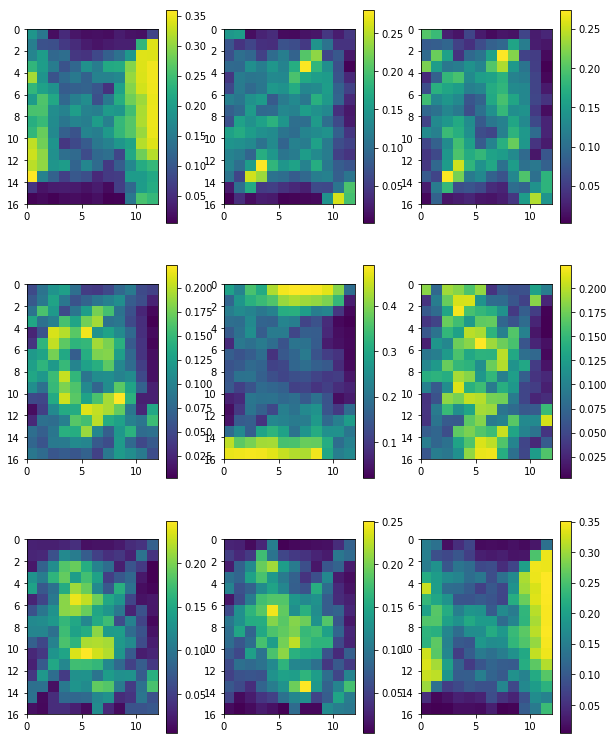

(16, 12, 9)

In [37]:
image = cv2.imread('CK.jpg')
myHog(image, 8, 8, 2, 2, 9)

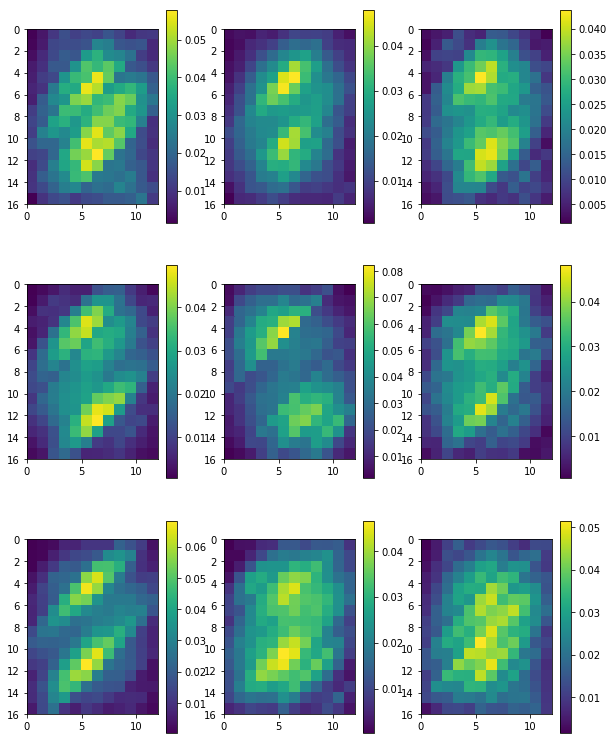

(16, 12, 9)

In [38]:
image = cv2.imread('CK.jpg')
myHog(image, 8, 8, 8, 8, 9)

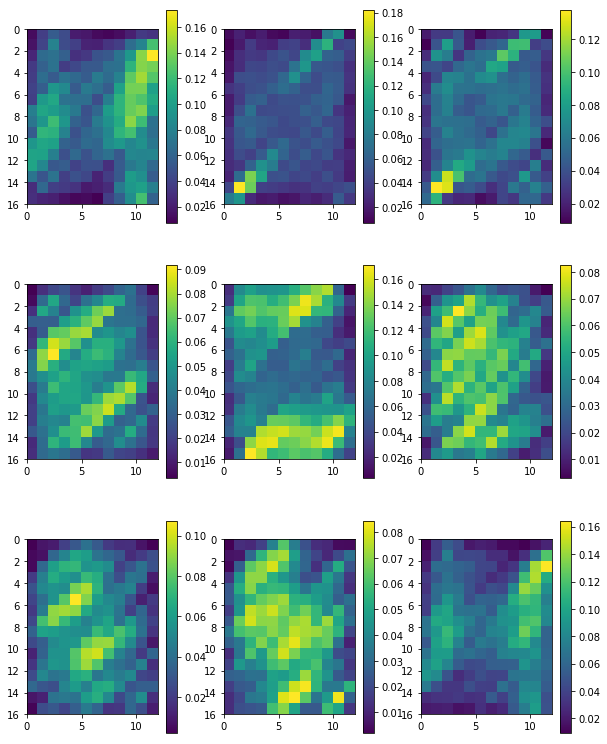

(16, 12, 9)

In [39]:
image = cv2.imread('CK.jpg')
myHog(image, 8, 8, 4, 4, 9)

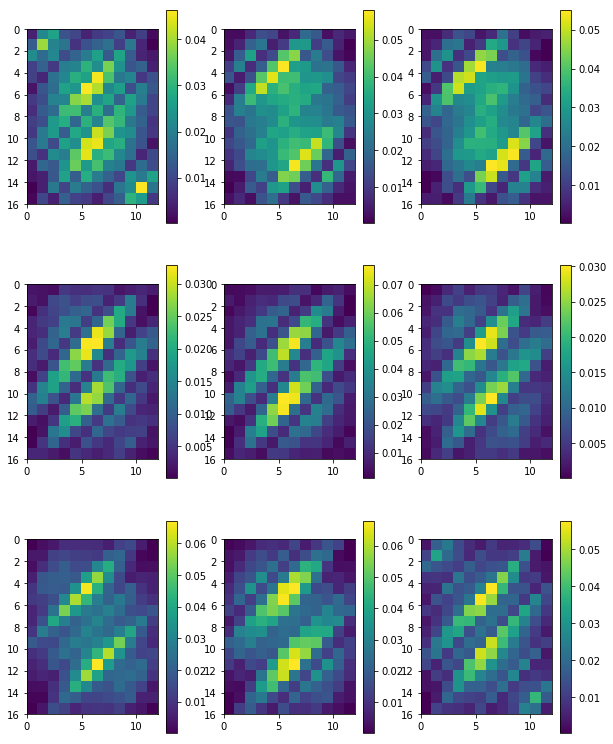

(16, 12, 9)

In [40]:
image = cv2.imread('spade10.jpg')
myHog(image, 8, 8, 8, 8, 9)

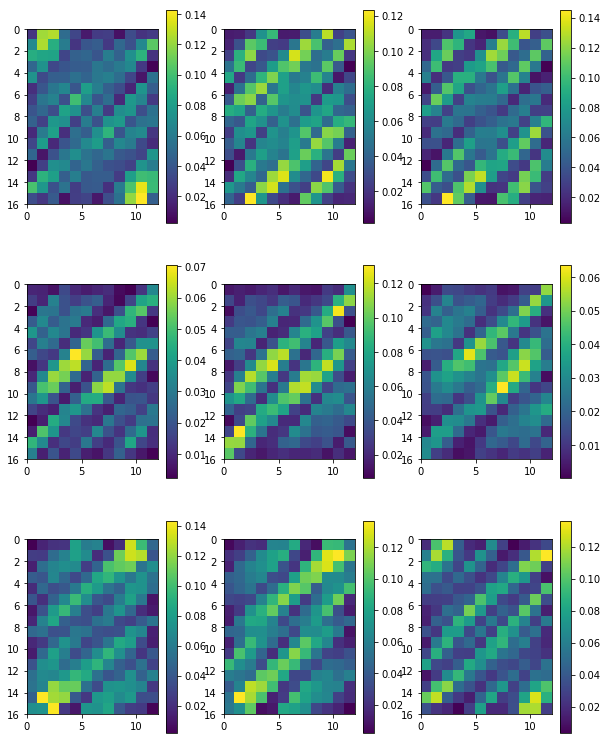

(16, 12, 9)

In [41]:
image = cv2.imread('spade10.jpg')
myHog(image, 8, 8, 4, 4, 9)

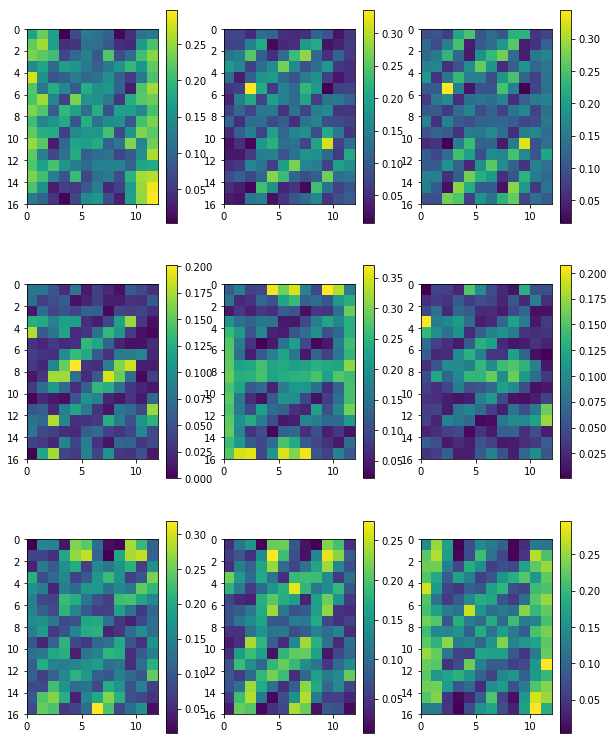

(16, 12, 9)

In [42]:
image = cv2.imread('spade10.jpg')
myHog(image, 8, 8, 2, 2, 9)

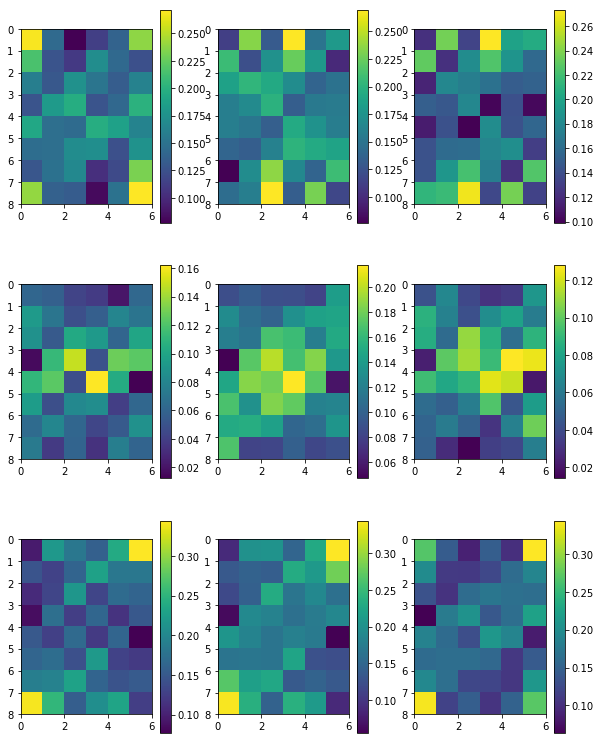

(8, 6, 9)

In [45]:
image = cv2.imread('spade10.jpg')
myHog(image, 16, 16, 2, 2, 9)

In [ ]:
image = cv2.imread('spade10.jpg')
myHog(image, 16, 16, 4, 4, 9)

In [ ]:
image = cv2.imread('spade10.jpg')
myHog(image, 4, 4, 2, 2, 9)

In [ ]:
image = cv2.imread('CK.jpg')
myHog(image, 4, 4, 2, 2, 9)